In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("./Iris.data", header=None)
#df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

#### LabelEncoder는 카테고리형 데이터를 숫자로 변환해주는 역할 (딥러닝을 위해 원핫 인코딩을 할 때 필요!)

In [8]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 'class' 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['class'] = label.fit_transform(df['class'])

df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0.5, 1.0, 'Label')

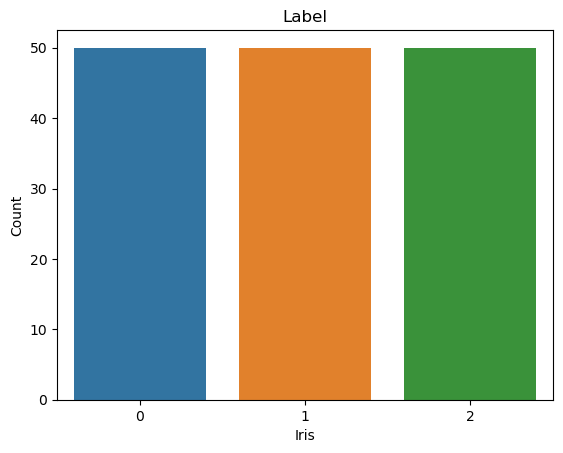

In [9]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("Iris")
plt.ylabel("Count")
plt.title("Label")

In [10]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

In [11]:
# 결측치 확인
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [12]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [13]:
X=df.drop('class', axis=1)
# class 컬럼 삭제하여 X에 저장, axis=1 이면 y축 기준
X.head()
# head()는 첫 5행만 출력함.

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y=df['class']
y.value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,sepal length,sepal width,petal length,petal width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [19]:
X_train.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [21]:
#X_train의 특성 개수
X_train.shape[1]

4

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [75]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [74]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test) 
#예측한 값을 pred_lr에 저장

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
#예측한 값과 실제 값을 비교
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [76]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


#### One-hot encoding
One-hot encoding의 장점은 다음과 같다.

1. 독립적인 표현: 각 범주는 다른 범주와 독립적으로 표현되므로 범주 간의 상대적인 크기와 순서를 부여하지 않는다.
2. 비선형 관계 표현: 범주 간의 관계를 비선형적으로 표현할 수 있다. 즉, 각 범주가 서로 독립적이고 관련성이 없다고 가정할 수 있다.
3. 모델의 해석 용이성: 범주형 변수를 이진 형태로 변환하면 모델이 이해하기 쉽고 해석하기 쉬운 형태로 입력된다.
4. 범주 간의 상대적 거리 제거: 레이블 인코딩(Label Encoding)을 사용하면 범주 간의 상대적인 거리 정보가 모델에 반영될 수 있다. 원-핫 인코딩은 이러한 문제를 해결하여 범주 간의 상대적인 거리 개념을 제거한다.

In [17]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,sepal length,sepal width,petal length,petal width
48,5.3,3.7,1.5,0.2
13,4.3,3.0,1.1,0.1
111,6.4,2.7,5.3,1.9
95,5.7,3.0,4.2,1.2
20,5.4,3.4,1.7,0.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [19]:
y_train

array([[ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [ T

---
### 활성화 함수(Activation Function)

활성화 함수(Activation Function)는 인공 신경망에서 각 뉴런의 출력을 결정하는 함수입니다. 인공 신경망은 입력값을 받아 여러 층의 뉴런과 연산을 거쳐 출력을 내는데, 이 때 각 층의 출력은 활성화 함수를 거치게 됩니다. 활성화 함수는 비선형 함수로서, 신경망의 표현력을 향상시키고 복잡한 데이터의 패턴을 학습할 수 있도록 도와줍니다.

- Sigmoid (시그모이드)
    출력을 0과 1 사이의 값으로 제한하여 이진 분류 문제에서 출력값을 확률로 해석할 수 있습니다. 그러나 그레이디언트 소실 문제가 발생할 수 있습니다.
- Softmax (소프트맥스)
    다중 클래스 분류 문제에서 출력층에 주로 사용되며, 출력을 각 클래스에 대한 확률로 해석할 수 있도록 정규화합니다.
- ReLu (렐루)
    입력이 0보다 작을 때는 0을 출력하고, 그 이상일 때는 입력 값을 그대로 출력합니다. 학습 속도가 빠르고 계산 효율이 좋습니다.
- Tanh (하이퍼볼릭 탄젠트)
    시그모이드와 비슷하지만 출력 범위가 -1과 1 사이입니다. 그레이디언트 소실 문제가 있을 수 있습니다.

---

In [95]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


model = Sequential()

model.add(Dense(15,input_shape=(X_train.shape[1],),activation='tanh'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))
#model.add(Dense(3, activation='sigmoid'))
#출력 유닛 수는 클래스 수(레이블 수)와 동일하게 설정한다!!!!!!

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy', metrics=['accuracy'])
# 이진 분류일 때, model.compile(Adam(lr=0.04),'bce',metrics=['accuracy']) 를 써야한다.

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 15)                75        
                                                                 
 dense_61 (Dense)            (None, 8)                 128       
                                                                 
 dense_62 (Dense)            (None, 6)                 54        
                                                                 
 dense_63 (Dense)            (None, 3)                 21        
                                                                 
Total params: 278 (1.09 KB)
Trainable params: 278 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
X_train.shape[1]

4

---
model.fit(): 모델을 주어진 훈련 데이터로 학습시키는 메서드입니다.

x=X_train: 입력 데이터로 사용할 훈련 데이터 (X_train)를 지정합니다.

y=y_train: 출력 데이터(타깃)로 사용할 훈련 데이터의 레이블 (y_train)를 지정합니다.

epochs=30: 전체 훈련 데이터셋을 몇 번 반복하여 학습할지를 나타내는 에포크(epoch) 수를 지정합니다.

batch_size=32: 한 번의 에포크에서 사용할 배치(batch) 크기를 지정합니다. 배치는 모델이 한 번에 처리하는 데이터 샘플의 수를 나타냅니다.

validation_data=(X_test, y_test): 검증 데이터셋으로 사용할 데이터 (X_test, y_test)를 지정합니다. 각 에포크가 끝날 때마다 검증 데이터셋을 사용하여 모델의 성능을 평가합니다.

model.fit() 메서드는 학습된 모델의 히스토리를 model_history 변수에 저장합니다. 이 히스토리에는 각 에포크별로 손실 함수 값과 지정된 평가 지표(예: 정확도) 등의 정보가 포함됩니다.

---

In [96]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
4/4 [==============================] - 2s 118ms/step - loss: 1.1495 - accuracy: 0.4911 - val_loss: 0.8534 - val_accuracy: 0.5789
Epoch 2/30
4/4 [==============================] - 0s 17ms/step - loss: 0.6991 - accuracy: 0.7411 - val_loss: 0.5185 - val_accuracy: 0.9737
Epoch 3/30
4/4 [==============================] - 0s 16ms/step - loss: 0.4346 - accuracy: 0.9732 - val_loss: 0.3850 - val_accuracy: 0.9211
Epoch 4/30
4/4 [==============================] - 0s 16ms/step - loss: 0.3270 - accuracy: 0.8929 - val_loss: 0.3091 - val_accuracy: 0.8947
Epoch 5/30
4/4 [==============================] - 0s 16ms/step - loss: 0.2802 - accuracy: 0.8839 - val_loss: 0.1876 - val_accuracy: 0.9737
Epoch 6/30
4/4 [==============================] - 0s 18ms/step - loss: 0.1430 - accuracy: 0.9643 - val_loss: 0.5764 - val_accuracy: 0.7368
Epoch 7/30
4/4 [==============================] - 0s 18ms/step - loss: 0.2418 - accuracy: 0.9107 - val_loss: 0.3527 - val_accuracy: 0.8421
Epoch 8/30
4/4 [==========

In [24]:
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1], dtype=int64)

In [26]:
y_pred_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2], dtype=int64)

In [28]:
X_test.head()

,sepal length,sepal width,petal length,petal width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [85]:
#실제 정답 값 = label
y_test

114    2
62     1
33     0
107    2
7      0
100    2
40     0
86     1
76     1
71     1
134    2
51     1
73     1
54     1
63     1
37     0
78     1
90     1
45     0
16     0
121    2
66     1
24     0
8      0
126    2
22     0
44     0
97     1
93     1
26     0
137    2
84     1
27     0
127    2
132    2
59     1
18     0
83     1
Name: class, dtype: int32

In [30]:
# 예측에 대한 확률 분포
y_pred

array([[7.8113681e-06, 1.6704023e-02, 9.8328811e-01],
       [2.5699402e-03, 9.9397683e-01, 3.4532440e-03],
       [9.9818891e-01, 1.8007479e-03, 1.0338282e-05],
       [8.9849264e-06, 1.8800914e-02, 9.8119009e-01],
       [9.9814069e-01, 1.8487647e-03, 1.0577315e-05],
       [7.3219717e-06, 1.5811969e-02, 9.8418081e-01],
       [9.9814308e-01, 1.8462971e-03, 1.0564750e-05],
       [2.2743016e-03, 9.9322695e-01, 4.4988096e-03],
       [2.0517251e-03, 9.9164855e-01, 6.2997434e-03],
       [2.9297404e-03, 9.9388123e-01, 3.1890420e-03],
       [1.2470677e-05, 2.4905104e-02, 9.7508246e-01],
       [2.5073779e-03, 9.9375337e-01, 3.7392166e-03],
       [2.0072388e-03, 9.9029887e-01, 7.6938504e-03],
       [1.9577537e-03, 9.9042410e-01, 7.6181442e-03],
       [1.6652782e-03, 9.8087078e-01, 1.7463895e-02],
       [9.9811858e-01, 1.8706915e-03, 1.0686472e-05],
       [1.7722826e-03, 9.8574775e-01, 1.2479998e-02],
       [1.7252804e-03, 9.8253804e-01, 1.5736701e-02],
       [9.9805743e-01, 1.931

### model.history
`model_history`는 `model.fit()` 메서드를 통해 학습된 모델의 학습 과정을 기록한 객체입니다. 이 객체는 각 에포크(epoch)별로 학습 손실(loss)과 정확도(accuracy), 그리고 검증 손실과 검증 정확도를 저장합니다. 따라서 `model_history`를 분석하여 모델의 학습 진행 상황을 확인할 수 있습니다.

`model.fit()` 메서드를 호출할 때 `validation_data` 매개변수를 통해 검증 데이터를 지정하였기 때문에, 각 에포크에서 학습 데이터와 검증 데이터에 대한 손실과 정확도가 기록됩니다.

주로 `model_history` 객체에서 확인할 수 있는 정보는 다음과 같습니다:

- **Loss (손실)**: 학습 데이터와 검증 데이터에 대한 손실 값의 변화 추이를 확인할 수 있습니다. 손실 값은 일반적으로 학습 과정에서 최소화되는 대상으로, 값이 감소할수록 모델의 성능이 향상되는 것을 의미합니다.

- **Accuracy (정확도)**: 학습 데이터와 검증 데이터에 대한 정확도의 변화 추이를 확인할 수 있습니다. 정확도는 모델이 예측한 결과가 실제 타겟과 일치하는 비율을 나타냅니다.

`model_history` 객체의 속성과 메서드를 사용하여 학습 과정을 시각화하고 분석할 수 있습니다. 일반적으로 `matplotlib` 라이브러리를 사용하여 학습 과정을 그래프로 표현하거나, 각 에포크에서의 손실과 정확도를 출력하여 모델의 성능을 평가합니다.

아래는 `model_history` 객체에서 주로 사용되는 속성과 메서드입니다:

- **`history` 속성**: `model_history.history`는 학습 과정에서 기록된 손실과 정확도를 담고 있는 딕셔너리입니다. 딕셔너리의 키는 `'loss'`, `'accuracy'`, `'val_loss'`, `'val_accuracy'` 등이 있습니다.

- **`plot` 메서드**: `matplotlib`을 사용하여 학습 과정을 그래프로 시각화합니다. 예를 들어, `plt.plot(model_history.history['loss'])`와 같이 사용하여 학습 손실의 변화를 그래프로 표현할 수 있습니다.

- **`evaluate` 메서드**: 학습이 완료된 모델을 평가할 때 사용합니다. 예를 들어, `model.evaluate(X_test, y_test)`와 같이 사용하여 테스트 데이터에 대한 손실과 정확도를 계산합니다.

따라서 `model_history`를 분석하여 모델의 학습 과정을 이해하고, 모델의 성능을 평가할 수 있습니다. 학습 과정에서 손실이 감소하고 정확도가 증가하는지 확인하여 모델의 학습 상태를 파악하고 모델의 성능을 개선할 수 있는 방안을 모색할 수 있습니다.

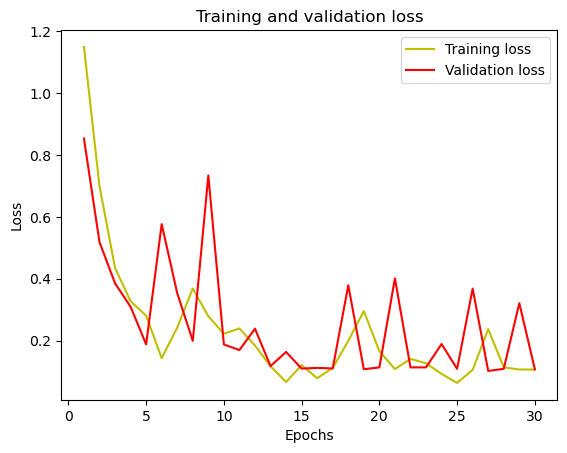

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력


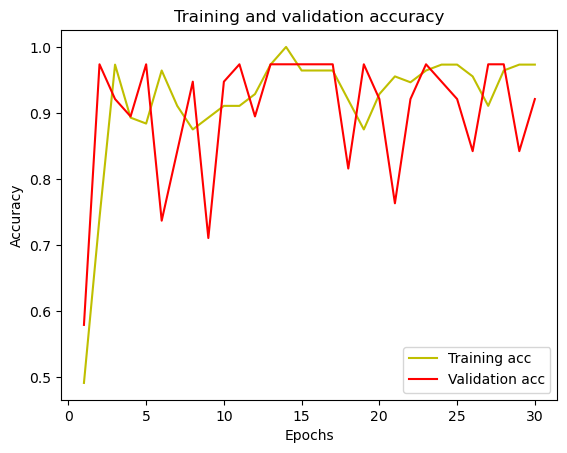

In [98]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Confusion Matrix (혼동행렬)

#### 정확도 (Accuracy) : 전체 샘플 중 올바르게 예측한 샘플의 비율

Accuracy = TP + TN / TP + TN + FP + FN

#### 정밀도 (Precision) :  Positive로 예측한 샘플 중 실제 Positive인 샘플의 비율

Precision = TP / TP + FP

#### 재현율 (Recall or Sensitivity) : 실제 Positive인 샘플 중 Positive로 올바르게 예측한 샘플의 비율

Recall = TP / TP + FN

#### F1-score: 정밀도와 재현율의 조화 평균으로, 모델의 종합적인 성능을 평가하는 지표, 데이터가 불균형할 때, 잘 동작하는지 평가지표가 된다.

F1-score = 2 x (Precision * Recall / Precision + Recall)

In [99]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.94      0.91        16
           2       0.88      0.78      0.82         9

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38

[[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]


In [100]:
loss, accuracy = model.evaluate(X_test, y_test)
print("테스트 데이터 손실:", loss)
print("테스트 데이터 정확도:", accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.1070 - accuracy: 0.9211
테스트 데이터 손실: 0.10699331015348434
테스트 데이터 정확도: 0.9210526347160339
